# Overview

In the digital age, social media addiction has emerged as a significant concern, with potential impacts on interpersonal relationships.

This dataset from [Kaggle (Social Media Addiction)](https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships) explores this dynamic by examining how digital dependency may influence the quality and stability of romantic, familial, and social connections.

Based on survey responses from a diverse group of participants, this analysis aims to uncover key patterns, such as:

- **Correlations** between time spent on social media and relationship dissatisfaction  
- **Behavioral differences** across genders and age groups  
- **Potential indicators** linking excessive social media use to conflict or relationship dissolution

Beyond quantitative insights, this study may offer valuable perspectives for psychologists, therapists, and policymakers, emphasizing the growing need for digital balance in an increasingly connected world.

**Objectives of This Analysis:**
1. Conduct exploratory data analysis (EDA) to understand variable distributions and relationships  
2. Test hypotheses regarding the impact of social media addiction on relationship dynamics  
3. Identify potentially at-risk groups

# Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import kagglehub
import os
import missingno as msno
import kuka

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

# Import dataset

In [2]:
#from PC
kaggle_dataset_path = kagglehub.dataset_download('adilshamim8/social-media-addiction-vs-relationships')

print(f'Directory content:')
for i in range(len(os.listdir(kaggle_dataset_path))):
    print(i,'-->',os.listdir(kaggle_dataset_path)[i])

Directory content:
0 --> Students Social Media Addiction.csv


In [3]:
#Read dataset:
dir_number = 0
data_original = pd.read_csv( os.path.join(kaggle_dataset_path, os.listdir(kaggle_dataset_path)[dir_number]), engine= 'python')

In [4]:
data_original

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [5]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

There are 705 students in the dataset.

Except for the ID column, the dataset includes 6 numerical features and 6 categorical features.  
The dataset contains no missing values.

# EDA - Exploratory Data Analysis

## Plot the distributions

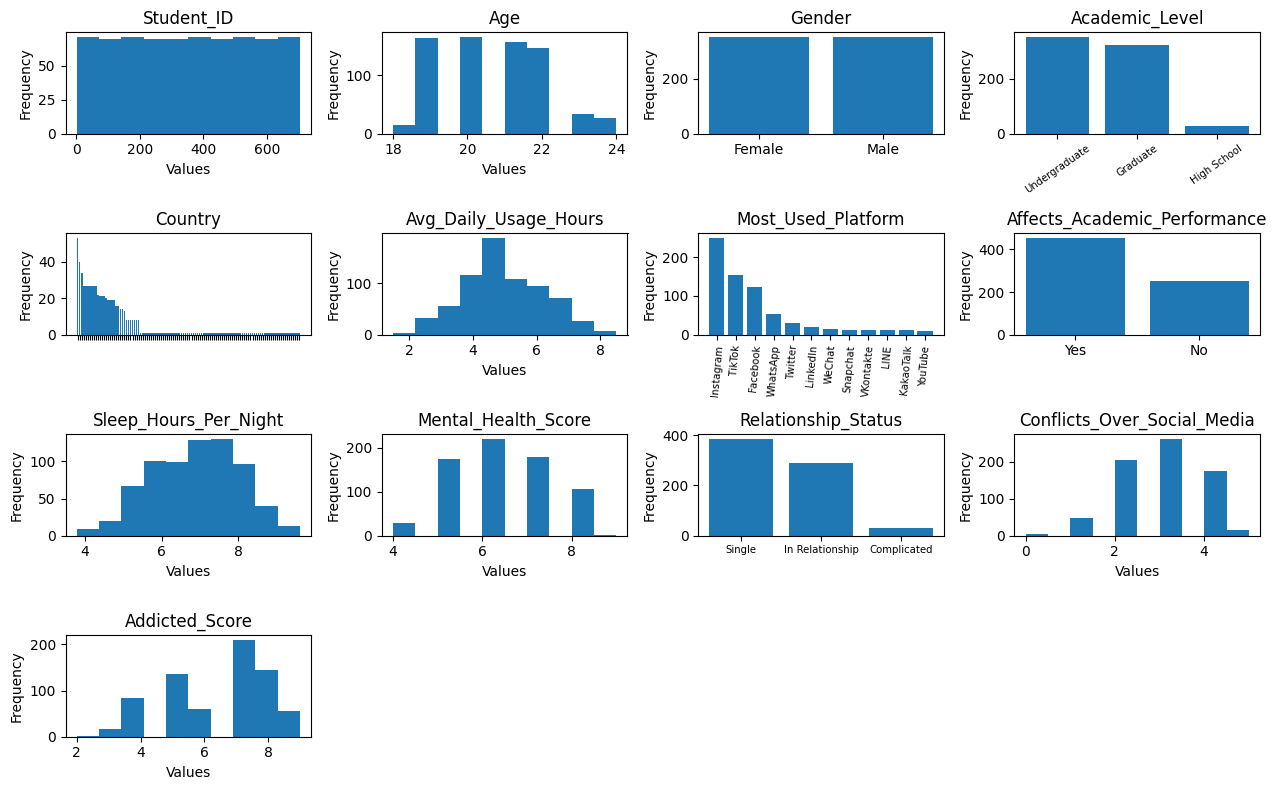

In [6]:
kuka.eda.plot_columns_dist(data_original, ncols=4, plotsize=(3.2,2));

**Key Insights from These Distributions:**

| Variable | Notes |
|:--:|:--|
| Age | Users are between 18 and 22 years old. |
| Gender | Males and females are almost equally represented. |
| Academic_Level | Undergraduate and graduate students are equally distributed. Few users are in high school. |
| Country | A large number of countries are represented. |
| Avg_Daily_Usage_Hours | Well-distributed. Students use social media for approximately 2 to 8 hours per day. |
| Most_Used_Platform | The most used platforms are Instagram, TikTok, and Facebook. |
| Affects_Academic_Performance | Most users report that their academic performance is affected by social media. |
| Sleep_Hours_Per_Night | Well-distributed. Most students sleep between 4 and 9 hours per night. |
| Mental_Health_Score | Good distribution considering it's a self-rated score. Few users report excellent mental health; most rate it around 6. |
| Relationship_Status | Most users are single. |
| Conflicts_Over_Social_Media | There's a potential bias: most users are single. |
| Addicted_Score | Most users have a high addiction score. |

**Notable biases were observed in the following attributes:**
- `Academic_Level`: Few high school users.
- `Most_Used_Platform`: Slight overrepresentation of some platforms.
- `Relationship_Status`: Slight bias toward single users.
- `Conflicts_Over_Social_Media`: Relatively high responses.
- `Addicted_Score`: Tends to be high overall.

Let's now investigate the relationships between these variables.

**First, the numerical variables:**


## Spearman correlation


    String type columns:

Gender       object
Academic_Level       object
Country       object
Most_Used_Platform       object
Affects_Academic_Performance       object
Relationship_Status       object
columns =  ['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']




Text(0.5, 1.0, 'Spearman correlation')

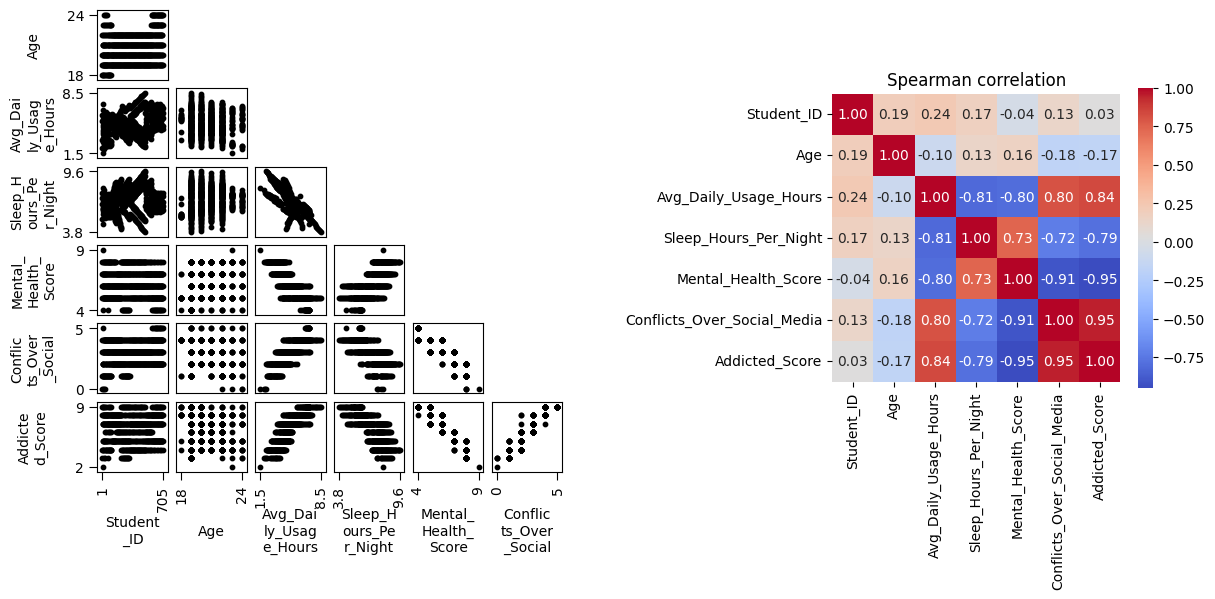

In [7]:
corr = data_original.corr(numeric_only=True, method='spearman',)


fig, ax = kuka.eda.plot_plairplot(data_original)

offset_inset_ax = 0.5
inset_ax = fig.add_axes([1.35, (1-offset_inset_ax)/2, offset_inset_ax+0.1, offset_inset_ax])  # [left, bottom, width, height] em coordenadas da figura
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', ax=inset_ax, square=True)
inset_ax.set_title('Spearman correlation')

The Pearson coefficient indicates the linear correlation between two variables.

In machine learning applications, highly correlated variables can sometimes interfere with each other and negatively impact model predictions.

**Key insights from these correlation plots**:

→ **ID**:

*The student ID shows no correlation with any variable, as expected.*

→ **Age**:

*There is no significant linear correlation between age and the other variables.*

→ **Other variables**:

*The more students use social media, the more addicted they tend to be ($r_P = 0.83$), and the more likely they are to have conflicts with other people ($r_P = 0.80$). At the same time, they tend to report lower mental health scores ($r_P = -0.80$) and sleep fewer hours per night ($r_P = -0.81$).*

Let's analyze the Spearman correlation coefficient for the categorical variables.

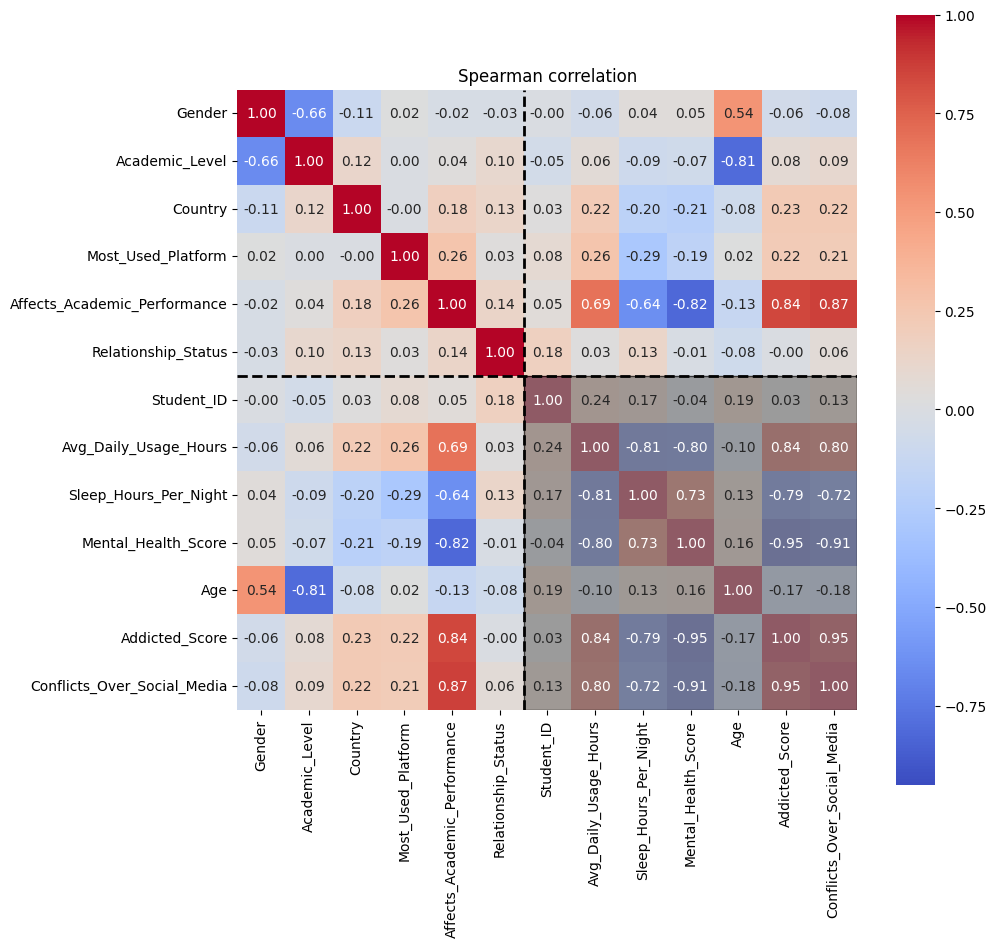

In [8]:
cat_cols = ['Gender', 'Academic_Level', 'Country',
            'Most_Used_Platform', 'Affects_Academic_Performance',
            'Relationship_Status']
num_cols = list(set(data_original.columns) - set(cat_cols))

cat_pipeline = Pipeline(steps=[
    ('encoder', OrdinalEncoder()),
    ('scaler', StandardScaler())
])
spearman_pipeline = Pipeline(steps=[
    ('preprocessor', 
        ColumnTransformer(transformers=[
                                ('cat', cat_pipeline, cat_cols),
                                ('num', StandardScaler(), num_cols)
                                ])
        )
])

transformed_data = spearman_pipeline.fit_transform(data_original)
transformed_data = pd.DataFrame( transformed_data, columns=cat_cols+num_cols )

corr = transformed_data.corr( method='spearman')
plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f',square=True)
ax.set_title('Spearman correlation')
plt.axhline(y=6, color='black', linestyle='--', linewidth=2)
plt.axvline(x=6, color='black', linestyle='--', linewidth=2)
plt.fill([6, 13, 13, 6], [6, 6, 13, 13], 
         color='grey', alpha=0.7, edgecolor='black')

***Note 1: The first 6 variables are categorical. The dashed line indicates the separation between categorical and numerical variables.***

***Note 2: Despite the preprocessing of the nominal categorical data, it makes more sense to look at the magnitude of the correlation, ignoring the sign (negative or positive). However, this method of calculating correlations for categorical variables is still limited.***

Basically, there is no correlation between the categorical variables, with the exception of Academic Level vs. Gender ($r_S = -0.66$).

Although Age does not have correlation with any numerical variable, it shows moderate correlation with Gender ($r_S = 0.54$) and with Academic Level ($r_S = -0.81$).

Furthermore, Academic Performance is highly correlated with "Conflicts_Over_Social_Media", "Addicted_Score", and "Mental_Health_Score". There is a moderate correlation with "Sleep_Hours_Per_Night" and "Avg_Daily_Usage_Hours".

Let's focus only on the correlations involving the Addicted Score:

<Axes: >

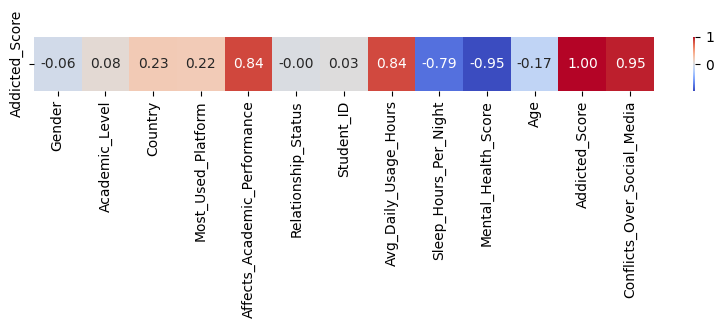

In [9]:
plt.figure(figsize=(10, 0.7))
sns.heatmap(corr[['Addicted_Score']].T, annot=True, cmap='coolwarm', fmt='.2f')

Variables most correlated with the Addicted Score:

1. **Self-Rated Mental Health Score** and **Conflicts Over Social Media**  
2. **Average Daily Use** and **Academic Performance**  
3. **Sleep Hours per Night**

These will be the most important variables to predict the addiction level. Most of them are correlated with each other, so you need to remove some to avoid noise.

First, we need to finish the ODE.

## Check outliers

Checking numeric attributes:

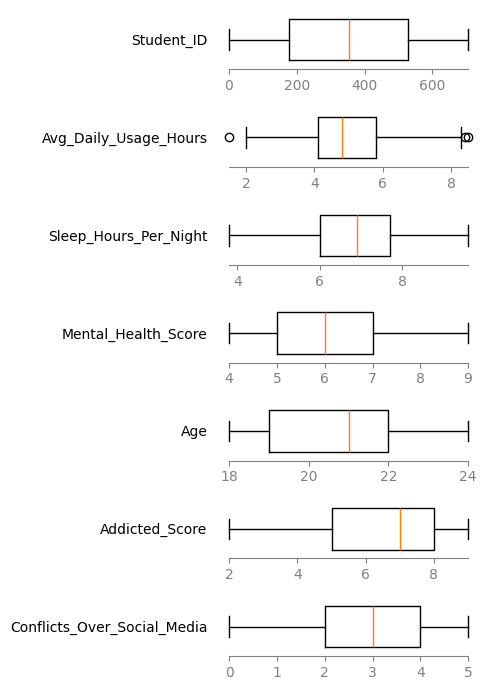

In [10]:
num_cols

fig, ax = plt.subplots(nrows=len(num_cols), figsize=(5,1*len(num_cols)))


for i, col in enumerate(num_cols):
    ax[i].boxplot(data_original[col], orientation='horizontal', widths=0.7)
    ax[i].set_yticklabels([col])
    # ax[i].set_ylabel(col, rotation=0, )
    for spine in ['top', 'right', 'left']:
        ax[i].spines[spine].set_visible(False)
    ax[i].tick_params(left=False, color='grey')
    ax[i].tick_params(axis='x', labelcolor='grey')
    ax[i].spines['bottom'].set_bounds(min(data_original[col]), max(data_original[col]))
    ax[i].spines['bottom'].set_color('grey')


plt.tight_layout()

There are just a few outliers in the "Average Daily Use" attribute. Otherwise, nothing noteworthy.

Now, let's check the categorical attributes with a small number of categories:

## Relationships Among Categorical Variables

In [11]:
sns.set_style("ticks")
num_cols_boxplot = num_cols.copy()
num_cols_boxplot.remove('Student_ID')
def plot(cat):
    fig, ax = plt.subplots(ncols=len(num_cols_boxplot), figsize=(16, 1.*len(data_original[cat].unique())), sharey=True )

    for j, num in enumerate(num_cols_boxplot):
        sns.boxplot(data=data_original, x=num, y=cat, ax=ax[j]);
    fig.suptitle(cat)
    fig.tight_layout()

    plt.figure(figsize=(5, 0.7))
    sns.heatmap(corr[[cat]].T[num_cols_boxplot], annot=True, cmap='coolwarm', fmt='.2f', vmax=1, vmin=-1)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

```
cat_cols = ['Gender','Academic_Level','Country','Most_Used_Platform','Affects_Academic_Performance','Relationship_Status']
```

Now it is better to examine the correlations between the categorical variables.

Let's plot the **box plots** to understand the relationships and use the **Spearman coefficient** to quantify their strength.

### Gender

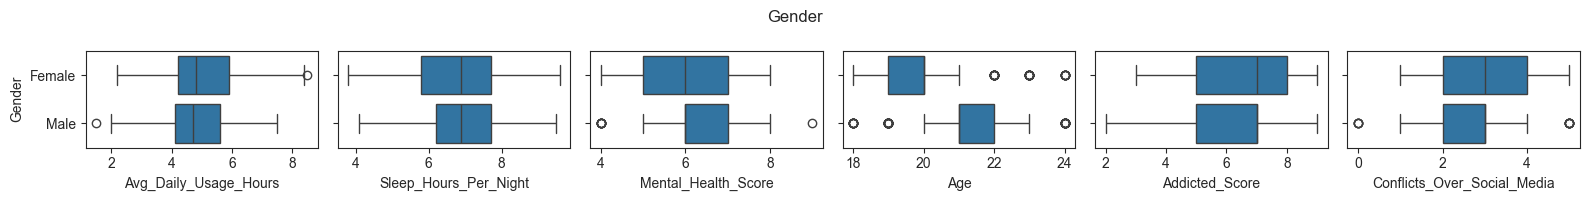

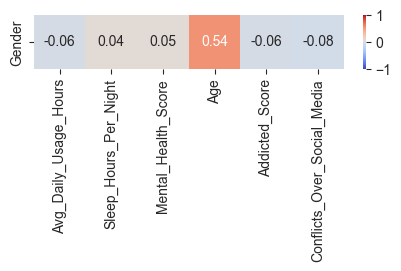

In [12]:
plot('Gender')

Remember that there is a good representation of gender. Therefore, the size of each group will not interfere with the analysis.

**Key insights:**

→ The female group tends to have a more Gaussian distribution.

→ The male group tends to have slightly fewer conflicts over social media, better mental health scores, and a slightly lower addiction score.

→ The male group tends to be older.

***Female users tend to be a vulnerable group to social media addiction. However, this is likely influenced by age, given that younger users tend to be female:***

c:\Users\Lhucas Tenorio\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'level', 'pallete'
  cset = contour_func(


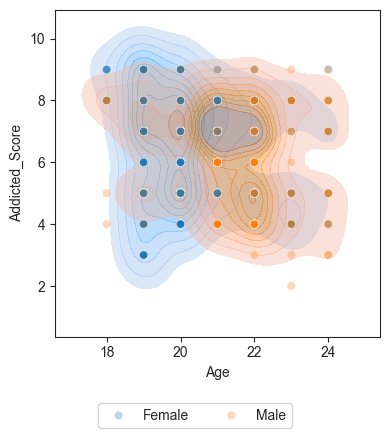

In [13]:
fig, ax = plt.subplots(figsize=(4,4))

sns.kdeplot(data=data_original, x='Age', y='Addicted_Score', hue='Gender', ax=ax, level=5, fill=True, alpha=0.4, pallete="husl")
sns.scatterplot(data=data_original, x='Age', y='Addicted_Score', hue='Gender', alpha=0.3, ax=ax)

ax.legend().remove()
fig.legend(loc='lower center', bbox_to_anchor=(0.5,-0.1), ncols=2)
fig.tight_layout()

**In other words, any variable influenced by "Gender" will also be partially correlated with Age.**

### Academic Level

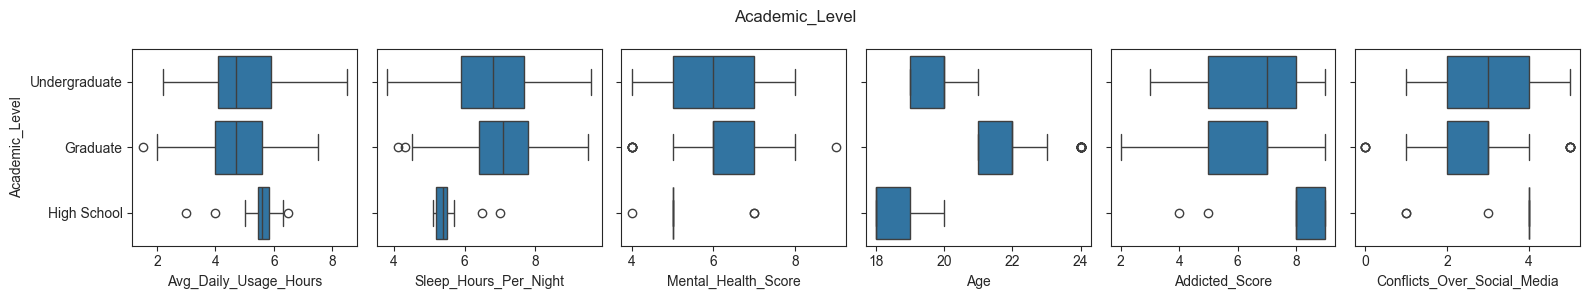

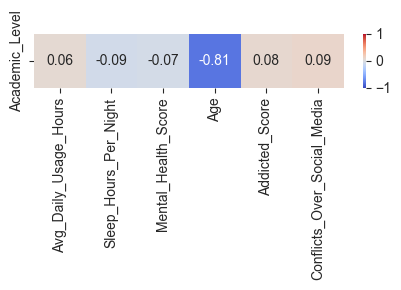

In [14]:
plot('Academic_Level')

In this case, there is inadequate representation of Academic Level. High School users are underrepresented in the dataset, which causes "anomalous" distributions in the box plots.

Ignoring the High School users, it is noticeable that Age has a strong correlation with Academic Level, as expected.

Furthermore, there are still small correlations: undergraduate students tend to have more conflicts over social media, lower mental health scores, and higher addiction scores.

***Key insight:***

***→ Due to the high correlation with Age, all of this reveals once again that younger students are more susceptible to social media addiction and its side effects (more conflicts and poorer mental health).***

### Academic Performance

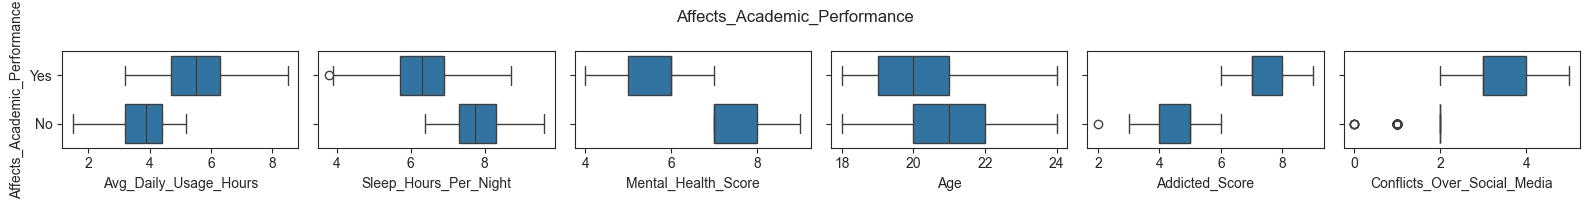

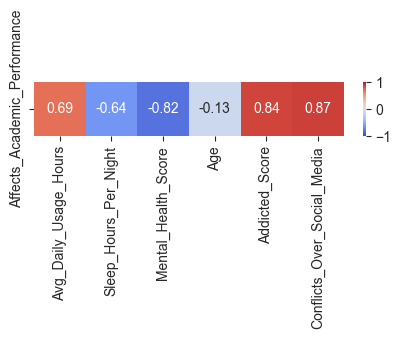

In [15]:
plot('Affects_Academic_Performance')

Academic Performance can indicate many things to us. Students whose academic performance is affected by social media:

→ Have fewer hours of sleep per night;

→ Use social media more;

→ Have more conflicts;

→ Have lower Mental Health Scores;

→ **As a result, have a high level of Social Media Addiction.**

There is no strong correlation between Academic Performance and Age. However, a slight tendency can be observed for younger students to have their academic performance affected.

### Relationship Status

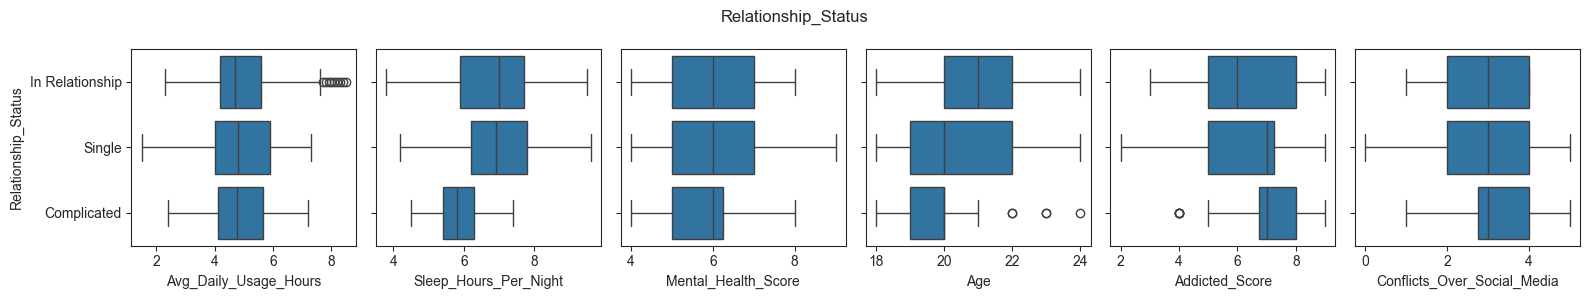

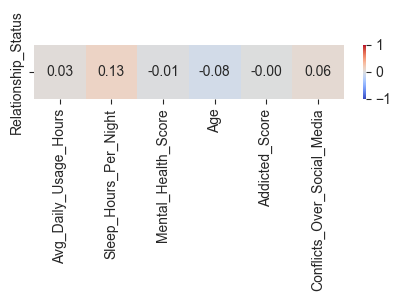

In [16]:
plot('Relationship_Status')

There is no correlation between Relationship Status and any other variable.

There is a slight tendency for younger students to have a "complicated" relationship status, be more addicted to social media, and feel its side effects.

### Most Used Platform

<Axes: >

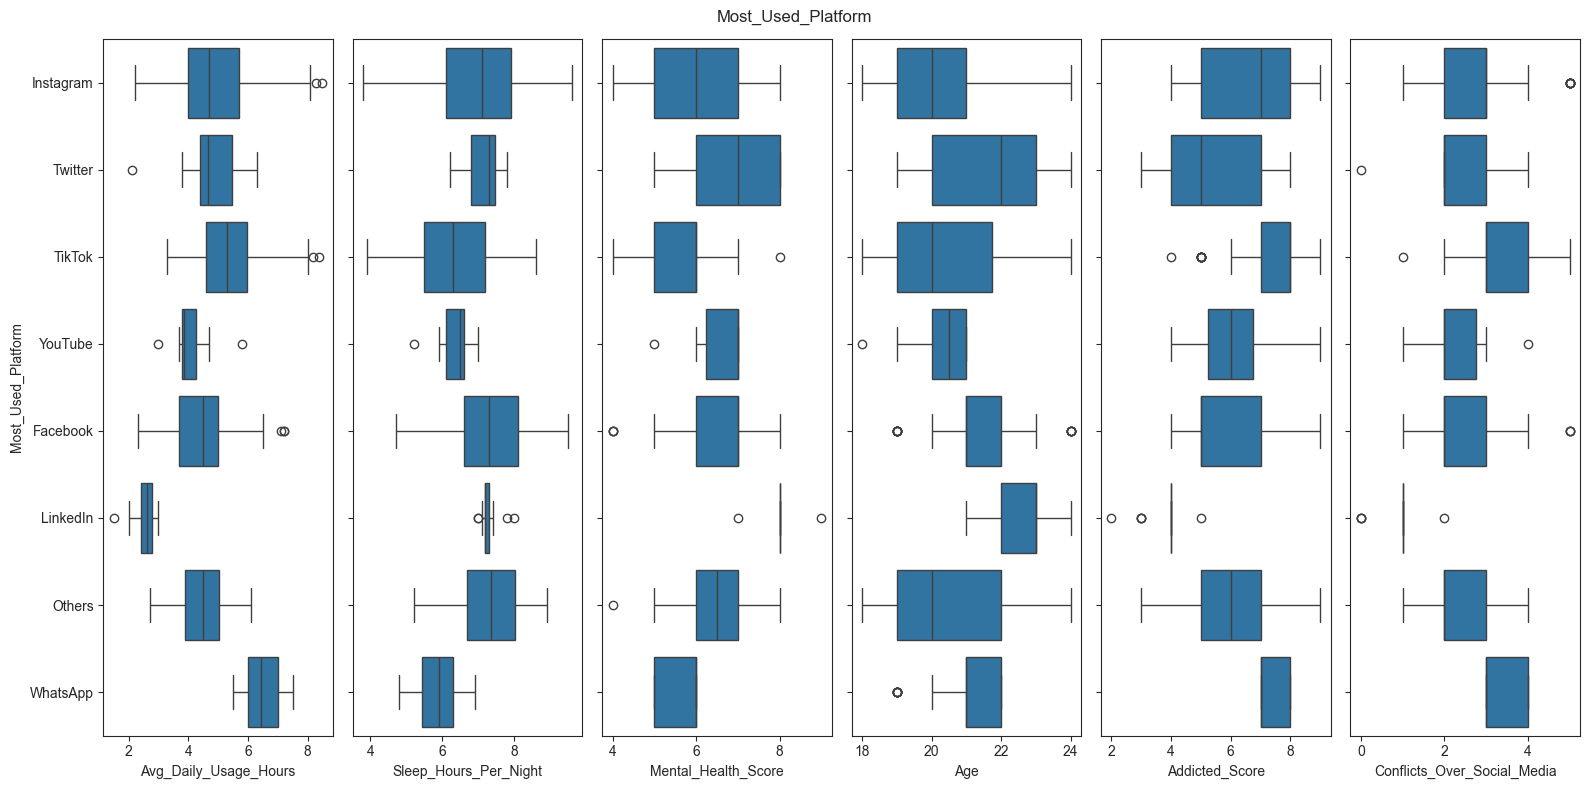

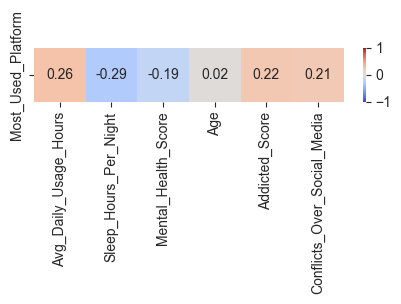

In [28]:
# Let's focus in the top 6 Social medias
data_Most_Used_Platform = data_original.copy()
Most_Used_Platform_vc = data_Most_Used_Platform['Most_Used_Platform'].value_counts()
Most_Used_Platform_lastPlat = dict(zip(Most_Used_Platform_vc.keys()[6:-1], ['Others']*(len(Most_Used_Platform_vc.keys())-6)))
data_Most_Used_Platform['Most_Used_Platform'] = data_Most_Used_Platform['Most_Used_Platform'].replace(Most_Used_Platform_lastPlat)

## BOXPLOT ##
cat = 'Most_Used_Platform'
fig, ax = plt.subplots(ncols=len(num_cols_boxplot), figsize=(16, 1.*len(data_Most_Used_Platform[cat].unique())), sharey=True )

for j, num in enumerate(num_cols_boxplot):
    sns.boxplot(data=data_Most_Used_Platform, x=num, y=cat, ax=ax[j]);
fig.suptitle(cat)
fig.tight_layout()

plt.figure(figsize=(5, 0.7))
sns.heatmap(corr[[cat]].T[num_cols_boxplot], annot=True, cmap='coolwarm', fmt='.2f', vmax=1, vmin=-1)


When we group the less used platforms into "Others," the correlation coefficients become slightly higher.

However, this can be observed:

**In Daily Usage:**

→ Students who use WhatsApp have higher average daily usage;

→ LinkedIn users are the ones who use social media the least.

**In Sleep Hours per Night:**

→ WhatsApp users sleep less than others.

**Mental Health Score:**

→ There is a tendency for students with lower mental health scores to use Instagram, TikTok, and WhatsApp.

→ LinkedIn users have the highest mental health scores.

**In Age:**

→ Younger users tend to use Instagram, TikTok, YouTube, and "Other" social media platforms;

→ Older users tend to use Twitter and LinkedIn;

→ Facebook and WhatsApp tend to be used by all age groups.

**In Conflicts Over Social Media:**

→ TikTok and WhatsApp users have more conflicts, while LinkedIn and Twitter users have fewer.

**In Addiction Score:**

→ Instagram, TikTok, and WhatsApp users tend to have higher social media addiction.

→ LinkedIn and Twitter users are the least addicted.

*So, all this analysis raises a question: Is any social media platform more addictive than others, or are these differences between social networks the result of other factors such as generational differences, gender, or academic level?*

### Conclusion

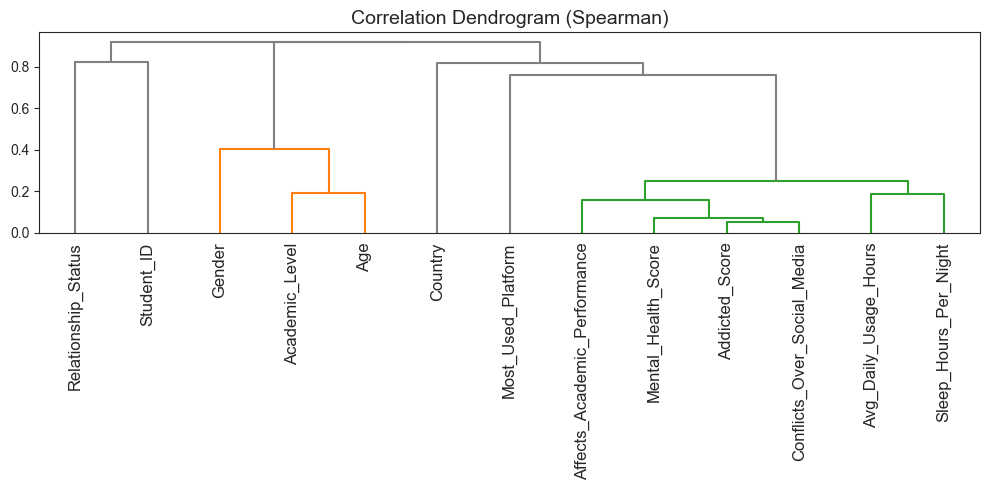

In [29]:
distance_matrix = 1 - corr.abs()
dist_vector = squareform(distance_matrix)
linked = linkage(dist_vector, method='average')

plt.figure(figsize=(10, 5))
dendrogram(linked,
            labels=corr.columns,
            leaf_rotation=90,
            leaf_font_size=12,
            color_threshold=0.5,
            above_threshold_color='gray')
plt.title("Correlation Dendrogram (Spearman)", fontsize=14)
plt.tight_layout()

As can be seen in the Spearman dendrogram, there are two groups that directly influence each other linearly.

**FIRST GROUP (green):**

- This group relates to Social Media Addiction Score and its side effects on students' lives. There is a strong tendency for addicted students to use social media more daily (as expected) and to sleep less. Furthermore, addiction tends to significantly affect academic performance. This condition tends to further harm the mental health of the students, and the number of conflicts in which the user is involved is a significant indicator of this.

**SECOND GROUP (blue):**

- In this group, there is a correlation between Age, Gender, and Academic Level. In general, female students tend to be younger and have a High School or Undergraduate academic level. Most male students are older and have a Graduate academic level.

Furthermore, these groups apparently do not correlate with each other, but upon deeper investigation, we realize that not only these variables have an indirect correlation with the Addiction Score, but the Most Used Platforms as well:
1. **GENDER:** The female group tends to have slightly more conflicts over social media, lower mental health scores, and consequently a slightly higher addiction score;
2. **ACADEMIC LEVEL:** Undergraduate students tend to have slightly more conflicts over social media, lower mental health scores, and higher addiction scores;
3. **AGE:** As there is a relationship between Age, Gender, and Academic Level, younger students tend to be more addicted;
4. **MOST USED PLATFORM:** Instagram, TikTok, and WhatsApp tend to be more addictive, while LinkedIn and Twitter users are less addicted.

The **relationship status** has practically no influence on social media addiction. "Complicated" status maybe it's a sign of addiction.
